# Исследование развлекательного приложения Procrastinate Pro+

Будем произоводить маркетинговый анализ развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. 

Задача — разобраться в причинах и помочь компании выйти в плюс. Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года.

### Импорт данных

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

In [2]:
#читаем csv-файлы
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')

except:
    visits = pd.read_csv('/my_folder_with_files/visits_info_short.csv')
    orders = pd.read_csv('/my_folder_with_files/orders_info_short.csv')
    costs = pd.read_csv('/my_folder_with_files/costs_info_short.csv')

### Первичный анализ данных

In [3]:
#смотрим в какой состоянии первый датасет
visits

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


In [4]:
#смотрим тип данных у столбцов
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


В данном датасете необходимо именить тип данных для столбцов "Session Start" и "Session End " с object на datetime. Так же, изменим названия стоблцов, согласно правилам хорошего кода Python

In [5]:
#смотрим в какой состоянии второй датасет
orders

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [6]:
#смотрим тип данных у столбцов
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


В этом датасете тоже необходимо изменить тип данных в стоблце "Event Dt" с object на datetime и тоже исправим названия первых двух столбцов

In [7]:
#смотрим в какой состоянии третий датасет
costs

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


In [8]:
#смотрим тип данных у столбцов
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


В третьем датасете тоже необхоимо изменить тип данных столбца "dt" с object на date

### Предобработка данных

In [9]:
#исправляем названия столбцов
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
orders.columns = ['user_id', 'event_dt', 'revenue']
costs.columns = ['dt', 'channel', 'costs']

In [10]:
#меняем тип данных в столбцах с датами и временем
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [11]:
#Изучим пропуски в столбцах
visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [12]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [13]:
costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

Пропусков нет, это хорошее начало. Посмотрим на дубликаты

In [14]:
visits.duplicated().sum()

0

In [15]:
orders.duplicated().sum()

0

In [16]:
costs.duplicated().sum()

0

Дуликатов так же не обнаружено. В целом предобработка данных завершена. 

## Задаём функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### Функция get_profiles()

In [17]:
# функция для создания пользовательских профилей
def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg({'session_start': 'first', 'channel': 'first', 'device': 'first', 'region': 'first',})
        .rename(columns={'session_start': 'first_ts'})
        .reset_index())

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index())

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left')

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Функция get_retention()

In [18]:
# функция для расчёта удержания
def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left')
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique')
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'}))
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days)

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция get_conversion()

In [19]:
# функция для расчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index())

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left')

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique')
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'}))
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days)

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция get_ltv()

In [20]:
# функция для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left')
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum')
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'}))
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'}))

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days)

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days)

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time)  # таблица динамики ROI

### Функция filter_data()

In [21]:
# функция для сглаживания фрейма
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Функция plot_retention()

In [22]:
# функция для визуализации удержания
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon))

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon))
    
    plt.tight_layout()
    plt.show()

### Функция plot_conversion()

In [23]:
# функция для визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция plot_ltv_roi()

In [24]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Функции заданы, переходим на следующий этап исследования

## Исследовательский анализ данных

- Составляем профили пользователей. Определяем минимальную и максимальную даты привлечения пользователей.
- Выясняем, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Строим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнаём, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Строим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучаем рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Строим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируем выводы.

### Профили пользователей

Исходя из данной информации в задании в шаге №5 "Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения" - в дальнейшем исследовании будем рассматривать все данные с моментом анализа - 1 ноября 2019 года. Горизонт анализа составит - 14 дней.

In [25]:
#момент анализа
observation_date = datetime(2019, 11, 1).date()

In [26]:
#горизонт анализа
horizon_days = 14

In [27]:
#составим профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [28]:
#определяем минимальную дату привлечения пользователей
min_date = profiles['dt'].min()
min_date

datetime.date(2019, 5, 1)

In [29]:
#определяем максимальную дату привлечения пользователей
max_date = profiles['dt'].max()
max_date

datetime.date(2019, 10, 27)

Исходя из представленных данных, минимальная дата привлечения пользователей - 1 мая 2019 года, а максимальная - 27 октября 2019 года.

### Пользователи и страны

In [30]:
#создадим функцию для автоматизации кода
def analyze_profiles(profiles):
    users_new = (
        profiles.groupby('region')
        .agg({'user_id': 'nunique', 'payer': 'mean'})
        .sort_values(by='payer', ascending=False))
    return users_new

In [31]:
#вызываем функцию
users_region = analyze_profiles(profiles)
users_region

,user_id,payer
region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


Пользователи приложения приходят из 4 стран: США, Германия, Англия и Франция. Наибольшая доля платящих пользователей относится к США.
Затем с достаточным отрывом за ними следуют пользователи из Германии, Англии и Франции.

### Пользователи и устройства

In [32]:
#определяем устройства, количество пользователей и долю платящих юзеров
def analyze_profiles(profiles):
    users_new = (
        profiles.groupby('device')
        .agg({'user_id': 'nunique', 'payer': 'mean'})
        .sort_values(by='payer', ascending=False))
    return users_new

In [33]:
#вызываем функцию
users_devices = analyze_profiles(profiles)
users_devices

,user_id,payer
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


Среди пользователей преимуществом пользуется устройство iPhone (более 54 тысяч пользователей), тем не менее, доля платящих юзеров с этого устройства немного меньше, чем доля платящих, использующих устройство Mac. Хоть по количеству уникальных пользователей устройство Mac на самом последнем месте (30 тысяч человек) - доля платящих пользователей у него лидирующая.

### Источники и пользователи

In [34]:
#определяем рекламные источники, количество пользователей и долю платящих юзеров
def analyze_profiles(profiles):
    users_new = (
        profiles.groupby('channel')
        .agg({'user_id': 'nunique', 'payer': 'mean'})
        .sort_values(by='payer', ascending=False))
    return users_new

In [35]:
#вызываем функцию
users_channel = analyze_profiles(profiles)
users_channel

,user_id,payer
channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


Мы имеем 11 рекламных источников. По доле платящих юзеров лидируют - FaceBoom (12%), AdNonSense(11%), lambdaMediaAds(10%). Среди всех источников на самом последнем месте находится organic - это источник, который не несет в себе никакой рекламы в плане привлечения - это самостоятельные переходы и скачивания приложения Procrastinate Pro+. 

Несмотря на то, что этот источник занимает последнее место по доле платящих юзеров - количество привлеченных пользователей этим источником лидирует среди остальных (больше 56 тысяч юзеров). С точки зрения рекламы - привлечение такого большого количества пользователей без вложения средств - отличный шанс для развития приложения, однако, неплатящие юзеры не самое надежное звено - такое большое количество пользователей можно объяснить, например, скачиванием и одноразовым использованием приложения либо просто скачиванием. Юзер может просто скачать приложение и в дальнейшем им не пользоваться - тем не менее, факт его наличия отразится на общей картине.

## Маркетинг

- Считаем общую сумму расходов на маркетинг.
- Выясняем, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Строим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Отражаем это на одном графике.
- Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей.

Пишем промежуточные выводы.

### Общая сумма расходов

In [36]:
#определим общую сумму затрат на маркетинг
all_cost = profiles['acquisition_cost'].sum()
all_cost

105497.29999999999

Общая сумма составила 105 тысяч 497 ден.ед.

### Затраты на каждый рекламный источник

In [37]:
#посчитаем сумму затрат на каждый источник
channel_cost = profiles.groupby('channel').agg({'acquisition_cost': 'sum'}).sort_values(by='acquisition_cost', ascending=False)

#добавим столбец, отображающий проценты от общих трат
channel_cost['cost_percent'] = (channel_cost['acquisition_cost'] / all_cost) * 100

#выводим таблицу
channel_cost

,acquisition_cost,cost_percent
channel,,
TipTop,54751.30,51.898295
FaceBoom,32445.60,30.754910
WahooNetBanner,5151.00,4.882589
AdNonSense,3911.25,3.707441
OppleCreativeMedia,2151.25,2.039152
RocketSuperAds,1833.00,1.737485
LeapBob,1797.60,1.703930
lambdaMediaAds,1557.60,1.476436
MediaTornado,954.48,0.904744


Лидирующим рекламным источником является TipTop - сумма затрат составила 54 751 ден.ед., затем следует FaceBoom - 32 445 ден.ед. и на третьем месте, со значительным снижением суммы WahooNetBanner - 5 151 ден.ед.

### Динамика изменения расходов по времени (по неделям и месяцам)

In [38]:
#создаем датафрейм для анализа изменений расходов по месяцам
costs_for_month = pd.DataFrame(costs, columns=['dt', 'channel', 'costs'])

In [39]:
#создаем столбец с разбивкой по месяцам
costs_for_month['month'] = pd.DatetimeIndex(costs_for_month['dt']).month

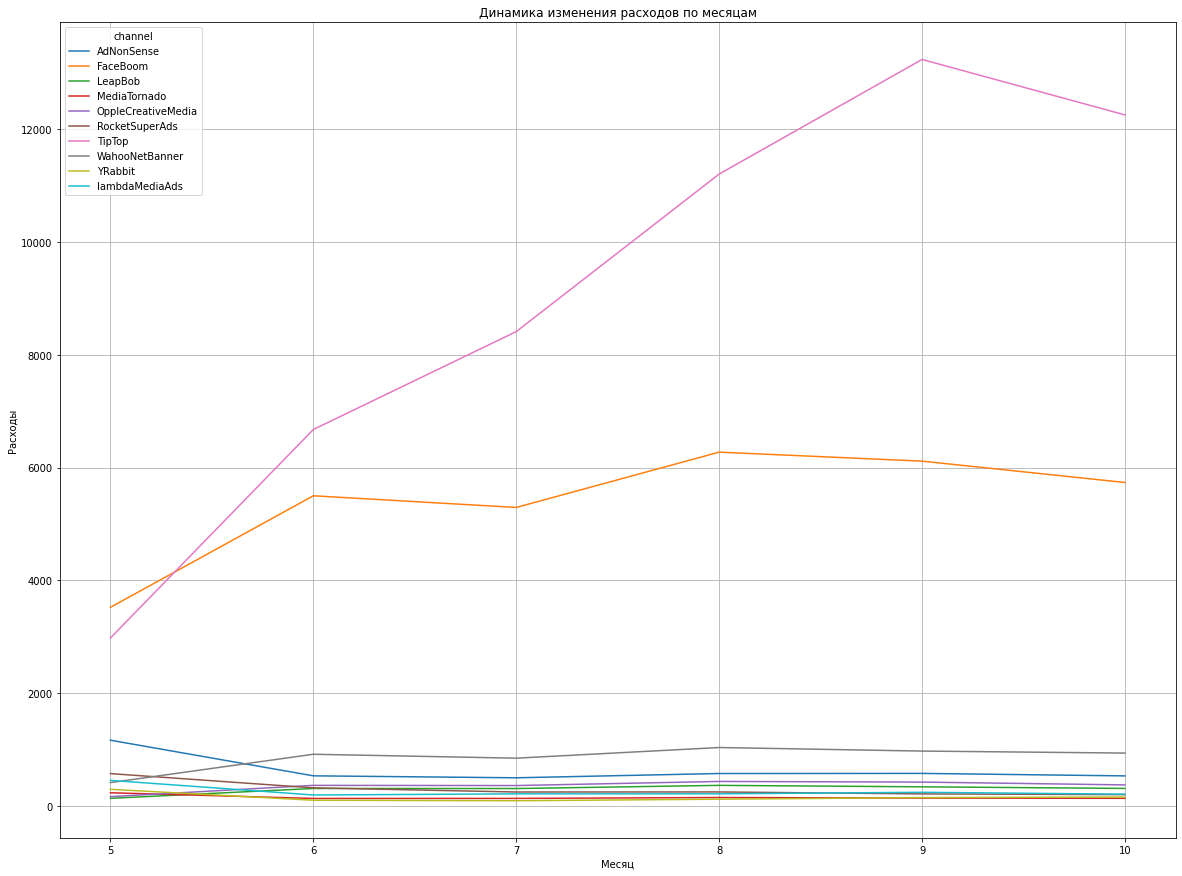

In [40]:
#строим график динамики изменений расходов по месяцам
costs_for_month.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum').plot(figsize=(20, 15), grid=True)

plt.title('Динамика изменения расходов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.show()

Анализируя график видно, что наибольшая динамика расходов у TipTop(на конец сентября - начало октября расходы превышают отметку 600 ден.ед) и FaceBoom (на конец сентября - начало октября расходы достигают отметки 300 ден.ед.). Остальные источники рекламы имеют гораздо меньшие объемы затрат, не превышающие 60 ден.ед.

In [41]:
#создаем датафрейм для анализа изменений расходов по неделям
costs_for_week = pd.DataFrame(costs, columns=['dt', 'channel', 'costs'])

In [42]:
#создаем столбец с разбивкой по неделям
costs_for_week['dt'] = pd.to_datetime(costs_for_week['dt'])
costs_for_week['week'] = costs_for_week['dt'].dt.isocalendar().week

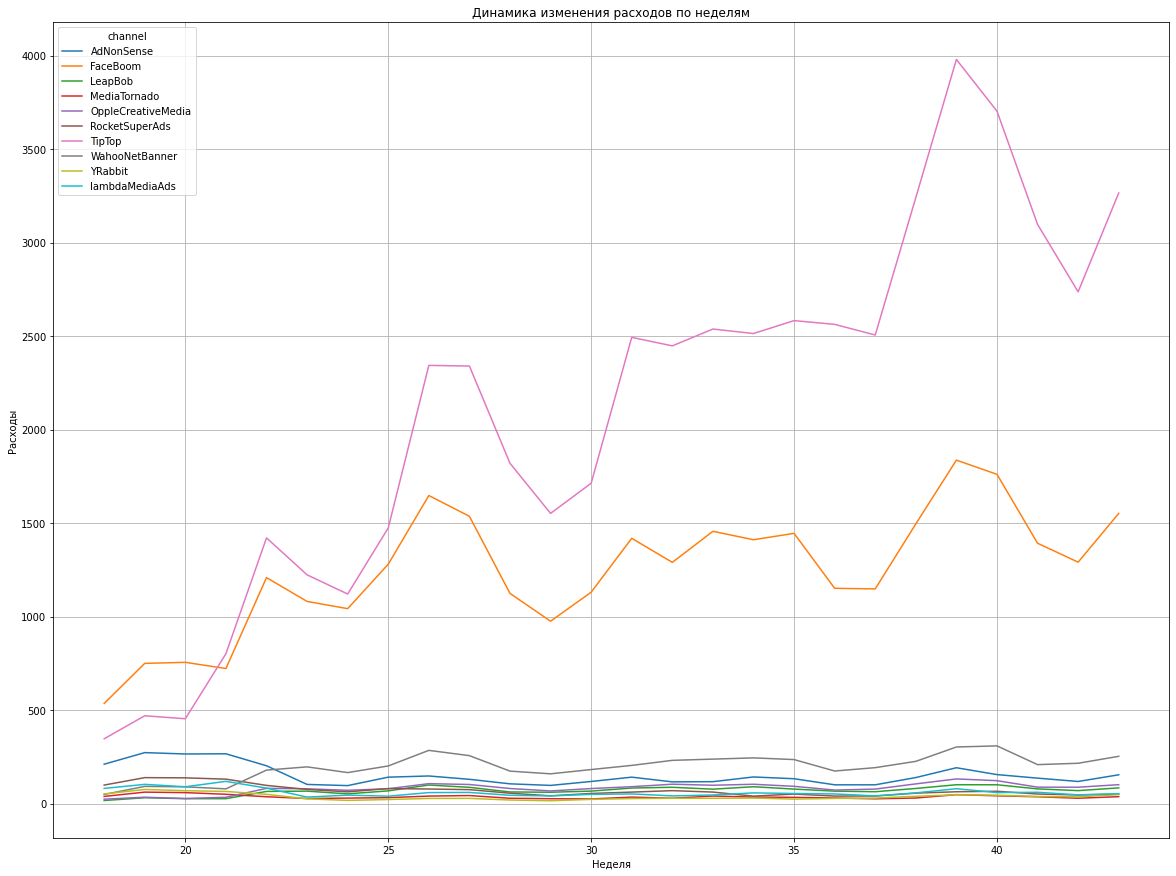

In [43]:
#строим график динамики изменений расходов по неделям
costs_for_week.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum').plot(figsize=(20, 15), grid=True)

plt.title('Динамика изменения расходов по неделям')
plt.xlabel('Неделя')
plt.ylabel('Расходы')
plt.show()

Наибольший расход средств на рекламу у источника TipTop пришелся на конец 39-й недели - и половину 41-й. Для источника FaceBoom пик затрат пришелся 39-40 неделю. 

### Средняя стоимость привлечения одного пользователя

In [44]:
#определим средний САС по всему проекту
project_cac = profiles.agg({'acquisition_cost': 'mean'})
project_cac

acquisition_cost    0.703278
dtype: float64

In [45]:
#вычислим среднюю стоимость привлечения пользователя
cost_cac = profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(by='acquisition_cost', ascending=False)
cost_cac

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Лидером по средней стоимости привлечения одного пользователя является канал TipTop(2.79 ден.ед), на втором месте FaceBoom(1.11 ден.ед), затем AdNonSense(1 ден.ед.). Все эти каналы превосходят по значению средний САС по всему проекту

## Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, анализируем окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определяем самостоятельно.

- Анализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверяем конверсию пользователей и динамику её изменения. То же самое делаем с удержанием пользователей. Строим и изучаем графики конверсии и удержания.
- Анализируем окупаемость рекламы с разбивкой по устройствам. Строим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Анализируем окупаемость рекламы с разбивкой по странам. Строим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Анализируем окупаемость рекламы с разбивкой по рекламным каналам. Строим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Отвечаем на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Пишем вывод, описываем возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

### Окупаемость рекламы с помощью графиков LTV и ROI

In [46]:
#определим максимальную дату привлечения пользователей
max_date_hor = observation_date - timedelta(days = horizon_days - 1)
max_date_hor

datetime.date(2019, 10, 19)

In [47]:
#уберем из дальнейших графиков органических пользователей
profiles = profiles.query('channel != "organic"')

In [48]:
#считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days)

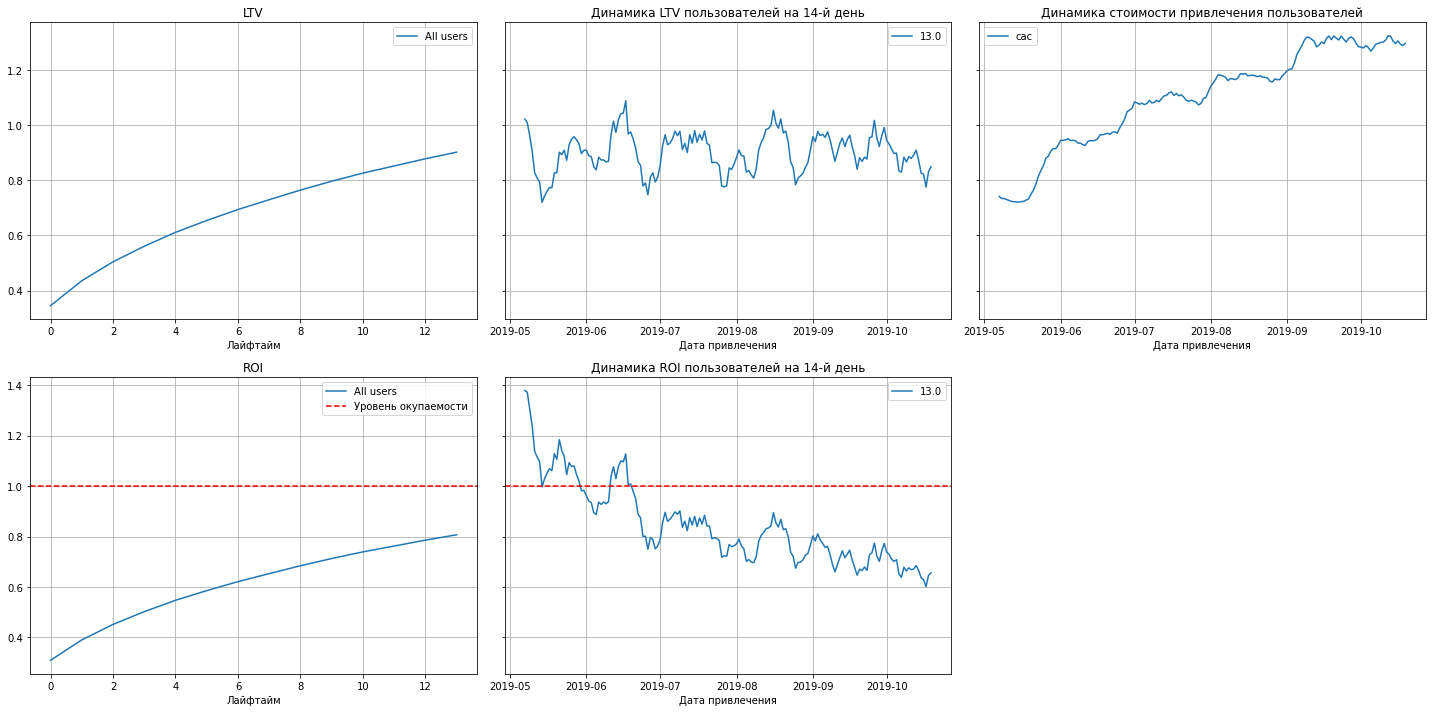

In [49]:
#строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Исходя из графиков, можно сделать следующие выводы:
 - Пожизненная ценность клиента (LTV) неизменно растёт, что в целом является благоприятным признаком
 - Стоимость привлечения пользователей (CAC) динамична, и растет с каждым месяцем, это поясняется тем, что с каждым месяцем для приложения Procrastinate Pro+ увеличивают бюджет на рекламу. Достаточно значительный скачок инвестиций в рекламу произошел в конце мая - начале июня и продолжает расти. Примем этот момент к вниманию для дальнейшего исследования
 - Окупаемость ивестиций (ROI) к концу анализируемого периода (ноябрь 2019 года) преодолела отметку 0.8, на данный момент расходы на рекламу больше, чем сумма доходов от клиентов, использующих приложение

### Конверсия и удержание пользователей

In [50]:
#строим таблицу конверсии
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 15)
conversion

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
cohort,,,,,,,,,,,,,,,,
All users,88056,0.058735,0.066321,0.069978,0.072545,0.074475,0.075736,0.076713,0.077564,0.078257,0.078916,0.079336,0.079643,0.079858,0.080154,0.080335


In [51]:
#таблица динамики конверсии 
conversion_history

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
dt,,,,,,,,,,,,,,,,
2019-05-01,390,0.058974,0.066667,0.071795,0.071795,0.076923,0.076923,0.076923,0.079487,0.082051,0.082051,0.082051,0.082051,0.082051,0.082051,0.082051
2019-05-02,323,0.058824,0.068111,0.068111,0.068111,0.068111,0.068111,0.068111,0.068111,0.068111,0.068111,0.071207,0.071207,0.071207,0.071207,0.071207
2019-05-03,346,0.057803,0.069364,0.075145,0.078035,0.083815,0.083815,0.083815,0.083815,0.083815,0.083815,0.083815,0.083815,0.083815,0.086705,0.086705
2019-05-04,457,0.070022,0.074398,0.076586,0.078775,0.085339,0.085339,0.087527,0.089716,0.089716,0.091904,0.091904,0.091904,0.091904,0.091904,0.091904
2019-05-05,438,0.036530,0.043379,0.047945,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511,0.052511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-14,480,0.064583,0.072917,0.079167,0.079167,0.079167,0.079167,0.079167,0.081250,0.081250,0.081250,0.081250,0.081250,0.083333,0.083333,0.083333
2019-10-15,442,0.065611,0.067873,0.072398,0.072398,0.079186,0.081448,0.083710,0.083710,0.083710,0.085973,0.085973,0.085973,0.085973,0.085973,0.085973
2019-10-16,436,0.045872,0.048165,0.057339,0.057339,0.057339,0.059633,0.059633,0.059633,0.059633,0.059633,0.059633,0.059633,0.059633,0.061927,0.061927


In [52]:
#считаем количество уникальных пользователей 
report = conversion['cohort_size'].sum()
report

88056

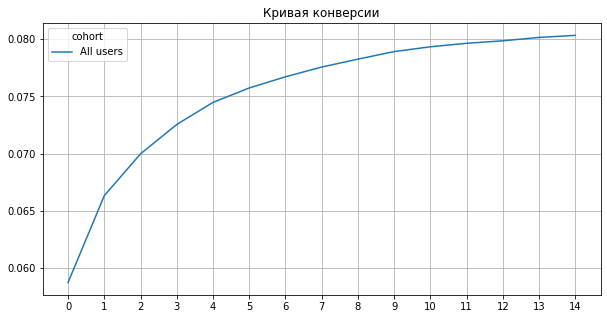

In [53]:
#строим кривую конверсии
report = conversion.drop(columns=['cohort_size'])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(10, 5))
plt.title('Кривая конверсии')
plt.show() 

Исходя из графика:
 - кривая конверсии плавно растет в направлении единицы
 - она не снижается
 
Конверсия рассчитана верно 

In [54]:
#считаем удержание
retention_raw, retention, retention_history = get_retention(profiles, visits, datetime(2019, 11, 1).date(), 15)
retention

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
payer,,,,,,,,,,,,,,,,
False,80797,1.0,0.176888,0.086476,0.051858,0.033479,0.024630,0.018590,0.014208,0.011634,0.009567,0.007500,0.006362,0.006052,0.004740,0.003886
True,7259,1.0,0.381044,0.292740,0.235983,0.210497,0.191349,0.167103,0.156771,0.145061,0.136382,0.135143,0.121918,0.118749,0.105662,0.109932


In [55]:
#таблица динамики удержания
retention_history

cohort_size    0         1         2         3         4  \
payer dt                                                                     
False 2019-05-01          358  1.0  0.212291  0.072626  0.061453  0.022346   
      2019-05-02          300  1.0  0.196667  0.103333  0.033333  0.030000   
      2019-05-03          315  1.0  0.180952  0.076190  0.066667  0.028571   
      2019-05-04          413  1.0  0.164649  0.101695  0.058111  0.024213   
      2019-05-05          412  1.0  0.191748  0.092233  0.065534  0.033981   
...                       ...  ...       ...       ...       ...       ...   
True  2019-10-14           41  1.0  0.292683  0.292683  0.243902  0.170732   
      2019-10-15           38  1.0  0.421053  0.263158  0.236842  0.157895   
      2019-10-16           27  1.0  0.481481  0.407407  0.259259  0.074074   
      2019-10-17           36  1.0  0.305556  0.250000  0.194444  0.083333   
      2019-10-18           56  1.0  0.321429  0.321429  0.232143  0.214286   

                         5         6         7         8         9        10  \
payer dt                                                                       
False 2019-05-01  0.011173  0.025140  0.011173  0.013966  0.008380  0.000000   
      2019-05-02  0.016667  0.023333  0.010000  0.006667  0.006667  0.010000   
      2019-05-03  0.028571  0.031746  0.015873  0.009524  0.003175  0.006349   
      2019-05-04  0.021792  0.014528  0.007264  0.021792  0.009685  0.012107   
      2019-05-05  0.021845  0.014563  0.019417  0.009709  0.000000  0.007282   
...                    ...       ...       ...       ...       ...       ...   
True  2019-10-14  0.097561  0.121951  0.121951  0.121951  0.073171  0.073171   
      2019-10-15  0.105263  0.078947  0.157895  0.131579  0.157895  0.105263   
      2019-10-16  0.148148  0.222222  0.148148  0.111111  0.111111  0.185185   
      2019-10-17  0.111111  0.027778  0.111111  0.166667  0.138889  0.111111   
      2019-10-18  0.321429  0.125000  0.142857  0.196429  0.142857  0.142857   

                        11        12        13        14  
payer dt                                                  
False 2019-05-01  0.011173  0.002793  0.013966  0.008380  
      2019-05-02  0.010000  0.016667  0.003333  0.003333  
      2019-05-03  0.003175  0.006349  0.003175  0.003175  
      2019-05-04  0.016949  0.002421  0.007264  0.007264  
      2019-05-05  0.009709  0.012136  0.002427  0.004854  
...                    ...       ...       ...       ...  
True  2019-10-14  0.048780  0.121951  0.121951  0.097561  
      2019-10-15  0.105263  0.026316  0.157895  0.078947  
      2019-10-16  0.037037  0.037037  0.111111  0.074074  
      2019-10-17  0.027778  0.138889  0.000000  0.138889  
      2019-10-18  0.142857  0.089286  0.035714  0.000000  

[342 rows x 16 columns]

In [56]:
#считаем количество уникальных пользователей 
report = retention['cohort_size'].sum()
report

88056

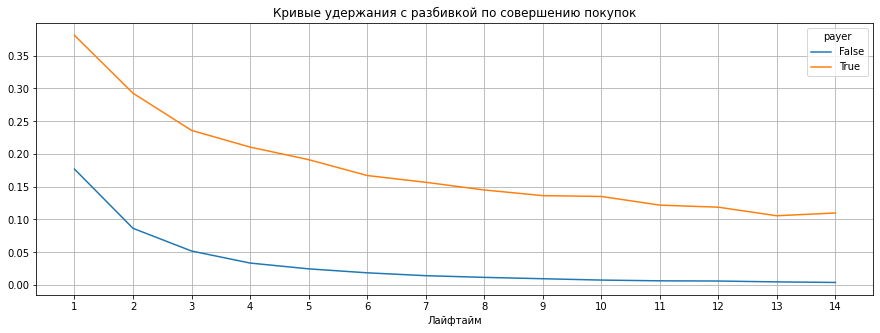

In [57]:
#строим кривые удержания
report = retention.drop(columns=['cohort_size', 0])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по совершению покупок')
plt.show() 

 - Кривая удержания пользователей, которые совершают покупки выше чем у неплатящих пользователей
 - Обе кривые постепенно снижаются
 
С удержанием так же всё в порядке

### Окупаемость рекламы по устройствам

In [58]:
#считаем окупаемость с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions)

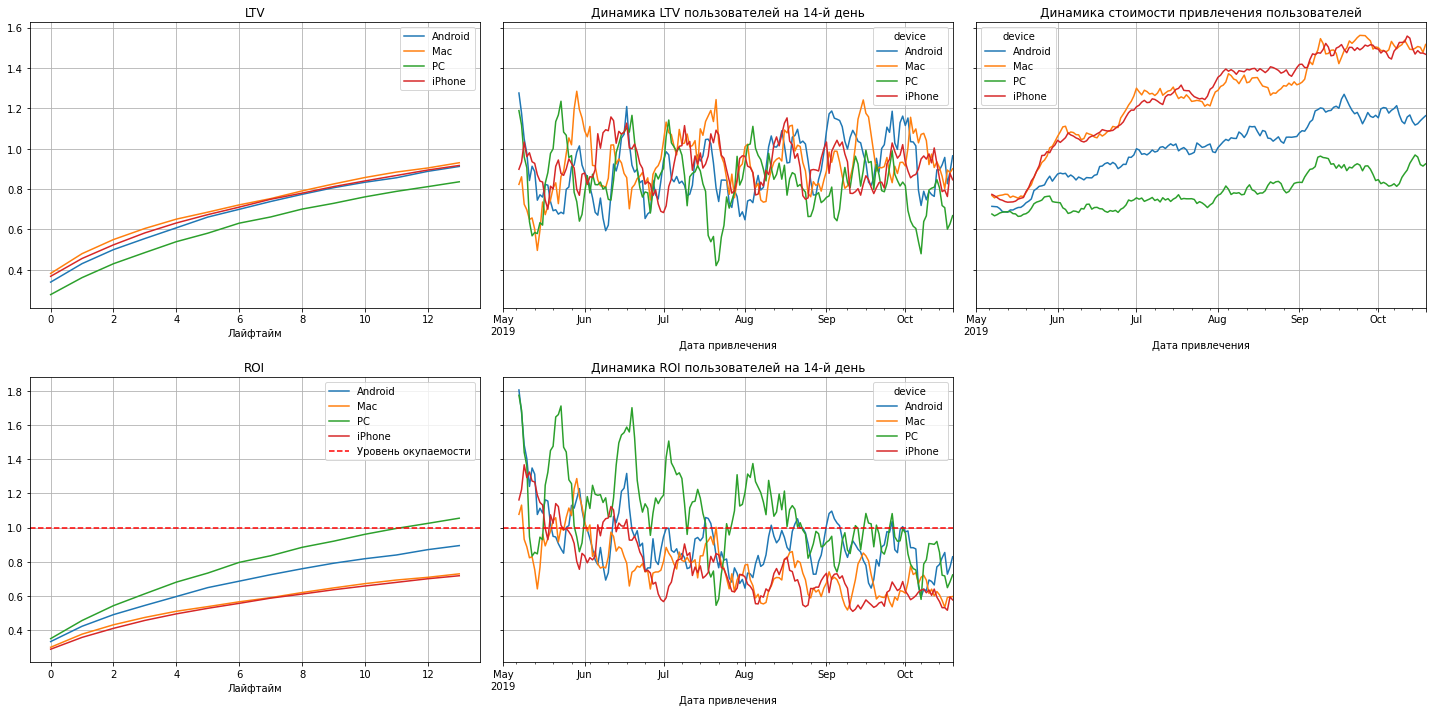

In [59]:
#строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Мы имеем:
 - LTV клиентов стабильно растёт
 - Начиная с конца мая сумма затрат на привлечение клиентов постоянно растёт
 - Пользователи PC окупаются, в то время как пользователи Mac, Android и iPhone не достигают предела окупаемости.


Посмотрим на конверсию и удержание по устройствам

In [60]:
#смотрим конверсию с разбивкой по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

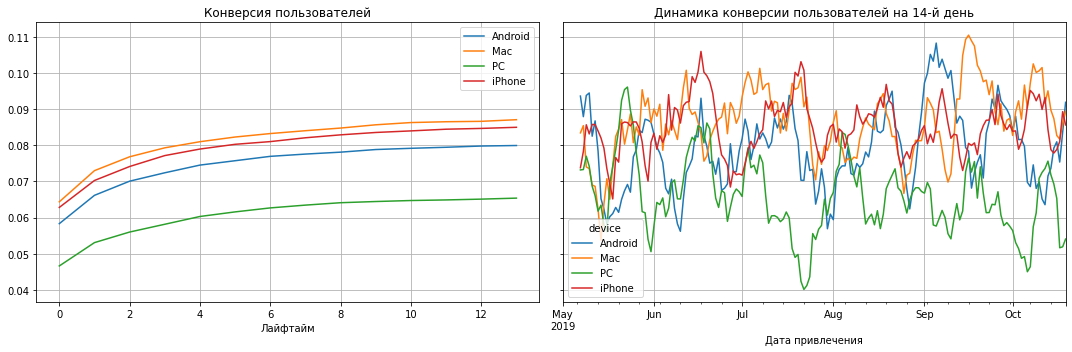

In [61]:
#строим графики
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

В целом конверсия по устройствам хорошая, посмотрим на удержание

In [62]:
#смотрим удержание с разбивкой по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

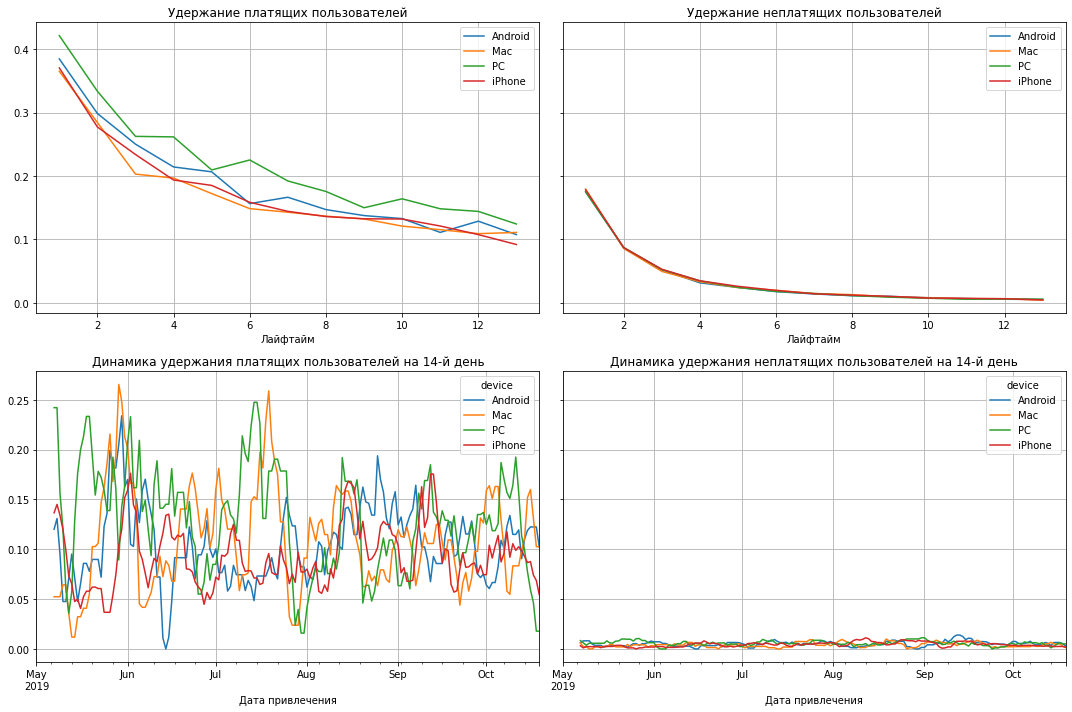

In [63]:
#строим графики
plot_retention(retention_grouped, retention_history, horizon_days) 

 - Удержание платящих пользователей снизилось с мая месяца к ноябрю примерно на 62%, при чем снижение происходит независимо от того, каким устройством пользуется юзер
 - Удержание неплатящих пользователей  снизилось за полгода на 96% так же, независимо от используемого устройства
 
Снижение удержания является достаточно серьезным показателем проблем.

В целом мы видим спад удержания, как у платящих, так и у неплатящих пользователей. Возможно, у пользователей возникают технические проблемы при использовании приложения (особенно, у пользователей Mac и iPhone).

Посмотрим окупаемость рекламы по другим показателям

### Окупаемость рекламы по странам

In [64]:
#смотрим окупаемость с разбивкой по странам
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

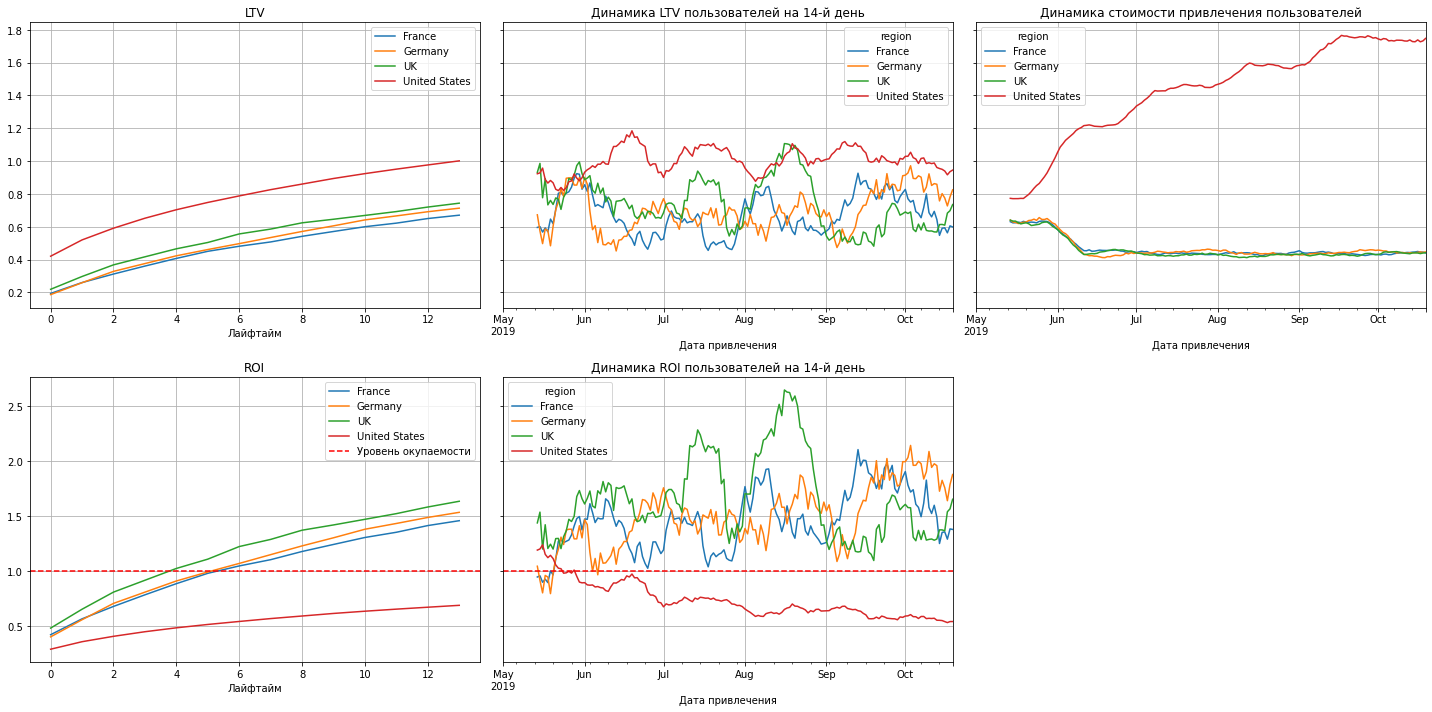

In [65]:
#строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

Исходя из данных:
 - LTV пользователей растёт
 - Виден очень большой рост расходов на рекламу в США, в то время как в остальных трех странах, расходы, начиная с середины июня даже снижаются
 - Пользователи из США не окупаются, в отличие от юзеров других стран
 
 Посмотрим на конверсию и удержание по странам

In [66]:
#смотрим конверсию с разбивкой по странам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

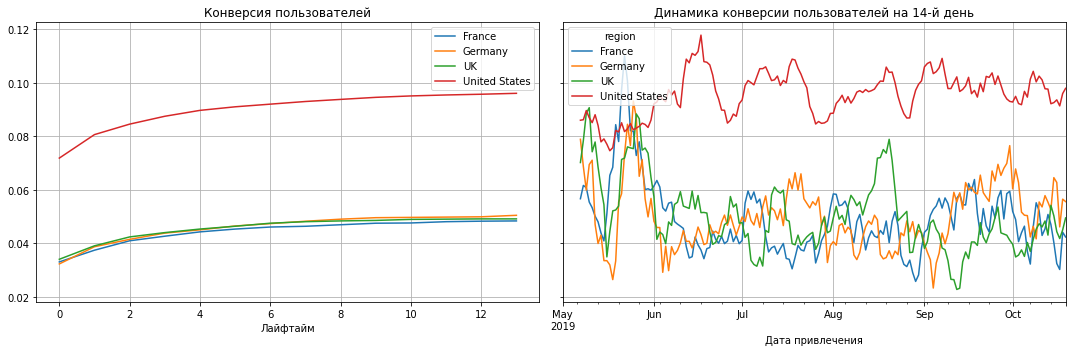

In [67]:
#строим графики
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей из США гораздо выше остальных стран, оценим удержание

In [68]:
#смотрим удержание с разбивкой по странам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

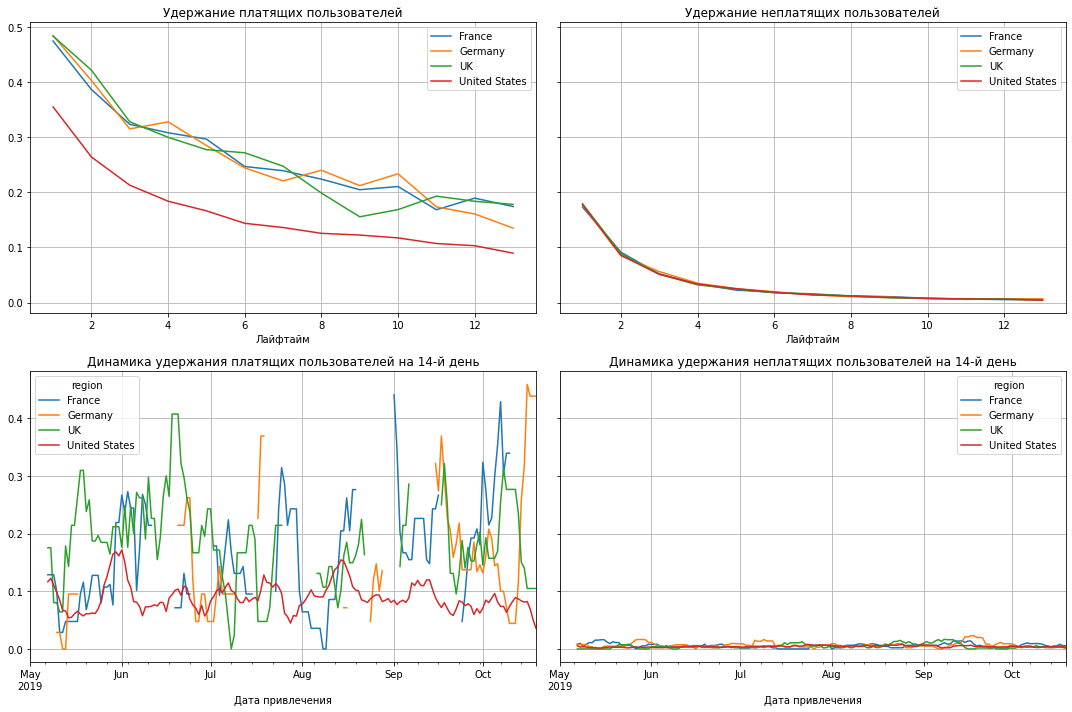

In [69]:
#строим графики
plot_retention(retention_grouped, retention_history, horizon_days) 

А вот удержание пользователей из США гораздо ниже удержания из других стран

### Окупаемость рекламы по рекламным каналам

In [70]:
#смотрим окупаемость с разбивкой по каналам
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

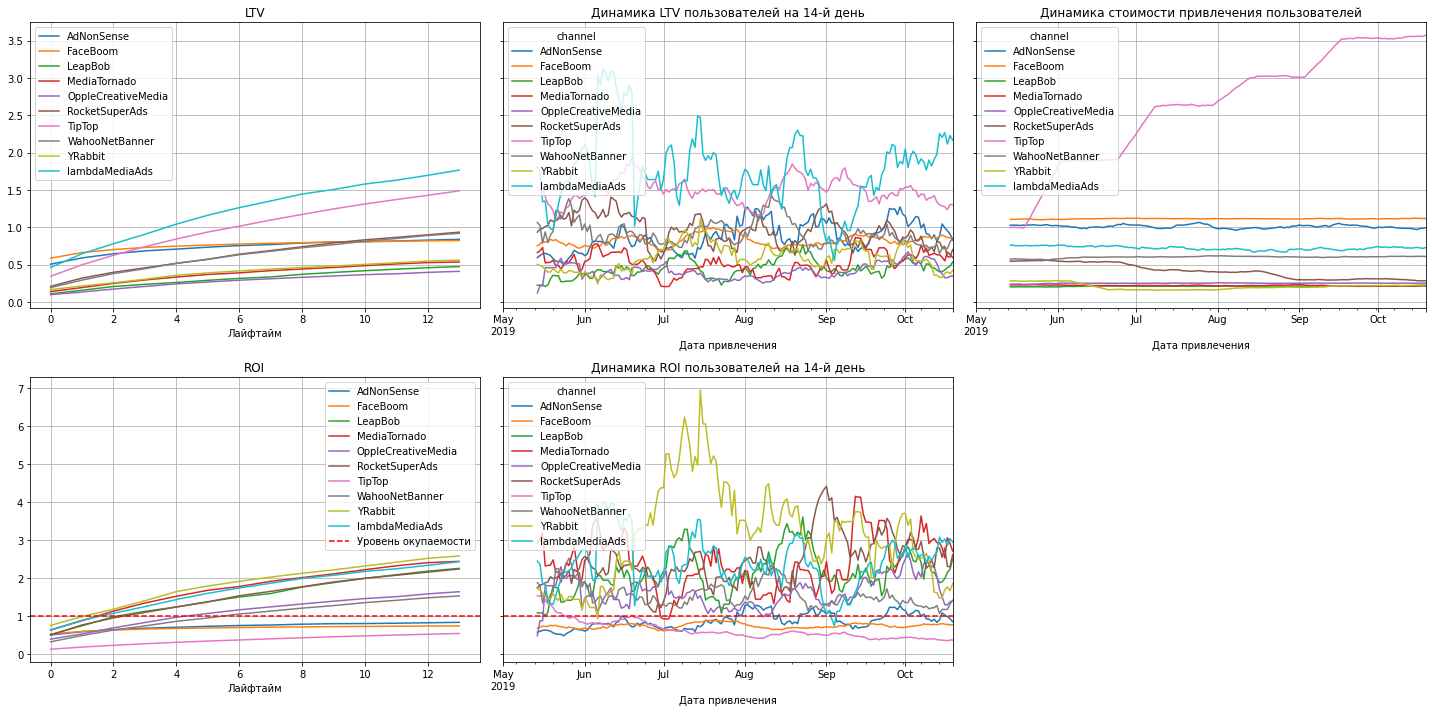

In [71]:
#строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

 - LTV пользователей растёт, особенно у каналов lambdaMediaAds и TipTop
 - Наибольший рост затрат на рекламу у канала TipTop
 - Не окупаются такие каналы: AdNonSense, FaceBoom, TipTop
 - Такие каналы как: YRabbit, MediaTornado, lambdaMediaAds, WahooNetBanner, RocketSuperAds, OppleCreativeMedia и LeapBob пересекают линию окупаемости
 
 Посмотрим на конверсию и удержание по каналам
 

In [72]:
#смотрим конверсию с разбивкой по каналам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

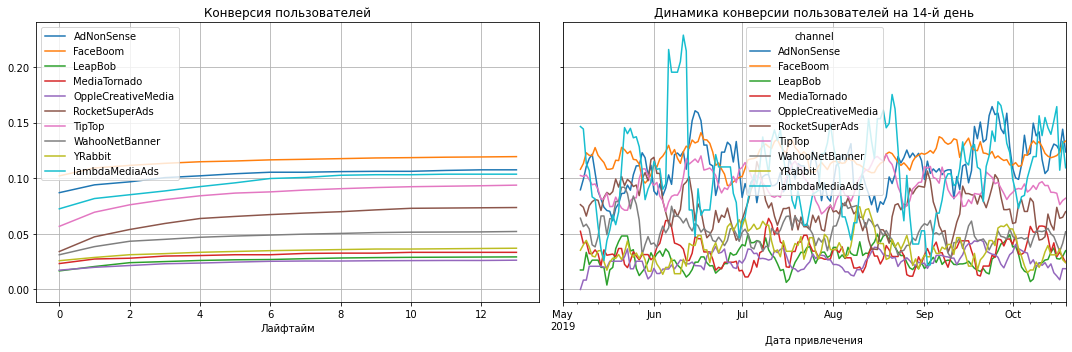

In [73]:
#строим графики
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

 - Наибольшая конверсия пользователей у канала FaceBoom
 - На 2, 3, 4, 5 и 6 месте соответственно - AdNonSense, lambdaMediaAds, TipTop, RocketSuperAds и WahooNetBanner
 - Каналы YRabbit, MediaTornado, OppleCreativeMedia и LeapBob имеют более низкую конверсию с небольшими отличиями друг с другом
 
Посмотрим на удержание

In [74]:
#смотрим удержание с разбивкой по каналам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

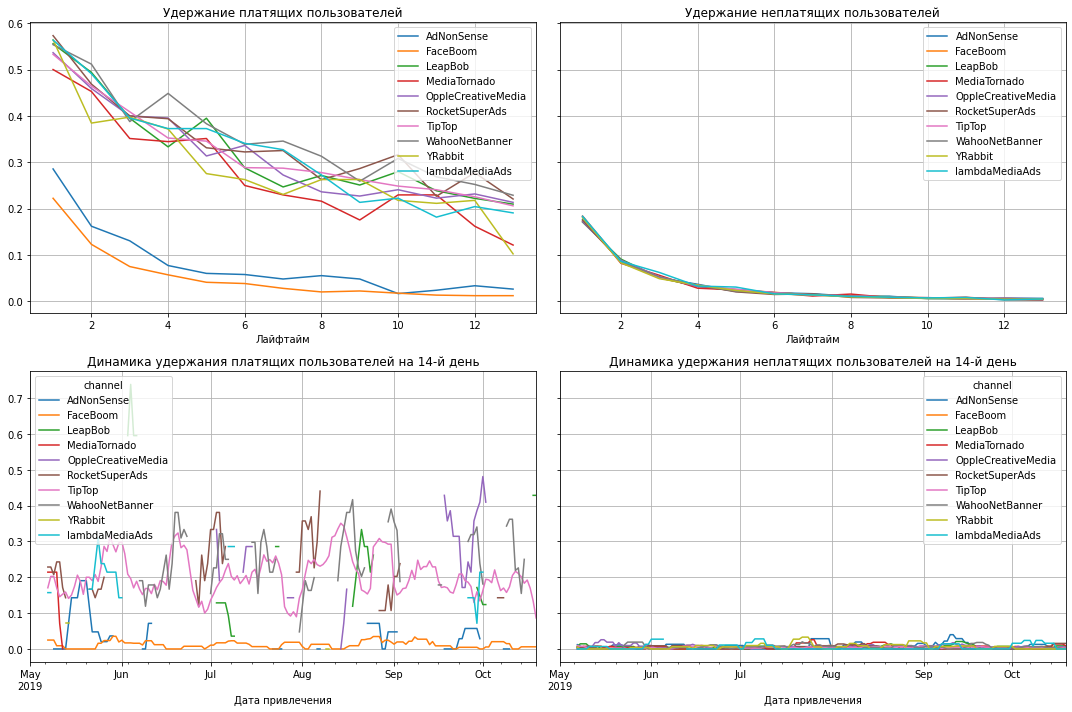

In [75]:
#строим графики
plot_retention(retention_grouped, retention_history, horizon_days) 

 - Удержание платящих пользователей у каналов AdNonSense и FaceBoom на порядок ниже удержания остальных каналов
 - Удержание неплатящих юзеров практически идентично между каналами и идёт на спад

Проанализируем основные моменты:

 - На момент исследования данных - реклама не достигает уровня окупаемости.
 - Исходя из анализа предоставленных данных возникают сложности с пользователями устройств Mac и iPhone. 
 - Помимо этого, выявлено очень большой расход средств на рекламу для США. 
 - Среди каналов на окупаемость рекламы негативно влияют - AdNonSense, FaceBoom и TipTop(у которого помимо неокупаемости еще и наибольшие расходы на привлечение пользователей) 

### Окупаемость рекламы по странам без лидеров САС

In [76]:
#посмотрим, какие каналы привлечения в каждой стране
region_channel = profiles.groupby(['region','channel'])
region_channel.nunique()

user_id  first_ts  device   dt  month  \
region        channel                                                     
France        AdNonSense             1366      1366       4  179      6   
              LeapBob                2988      2988       4  180      6   
              OppleCreativeMedia     2991      2991       4  180      6   
              WahooNetBanner         2971      2971       4  180      6   
              lambdaMediaAds          742       742       4  172      6   
Germany       AdNonSense             1219      1219       4  178      6   
              LeapBob                2519      2519       4  180      6   
              OppleCreativeMedia     2562      2561       4  180      6   
              WahooNetBanner         2579      2578       4  180      6   
              lambdaMediaAds          649       649       4  170      6   
UK            AdNonSense             1295      1295       4  180      6   
              LeapBob                3046      3045       4  180      6   
              OppleCreativeMedia     3052      3052       4  180      6   
              WahooNetBanner         3003      3003       4  180      6   
              lambdaMediaAds          758       758       4  177      6   
United States FaceBoom              29144     29113       4  180      6   
              MediaTornado           4364      4361       4  180      6   
              RocketSuperAds         4448      4448       4  180      6   
              TipTop                19561     19552       4  180      6   
              YRabbit                4312      4312       4  180      6   

                                  payer  acquisition_cost  
region        channel                                      
France        AdNonSense              2                75  
              LeapBob                 2                97  
              OppleCreativeMedia      2                98  
              WahooNetBanner          2               100  
              lambdaMediaAds          2                51  
Germany       AdNonSense              2                74  
              LeapBob                 2                97  
              OppleCreativeMedia      2                98  
              WahooNetBanner          2               100  
              lambdaMediaAds          2                50  
UK            AdNonSense              2                75  
              LeapBob                 2                97  
              OppleCreativeMedia      2                98  
              WahooNetBanner          2               100  
              lambdaMediaAds          2                51  
United States FaceBoom                2               138  
              MediaTornado            2                80  
              RocketSuperAds          2               120  
              TipTop                  2               141  
              YRabbit                 2               136

 - Каналы привлечения у Германии, Франции и Англии идентичны, в то время как у США совершенно иные.
 - Один из лидирующих неокупающихся каналов - AdNonSense - им пользуются 3 страны, исключая США
 - Остальные два - FaceBoom и TipTop  - эти два неокупающихся каналов используются только в США

Оценим общие показатели, устранив 3-х лидеров по наибольшей средней стоимости привлечения пользователей (САС) - TipTop, FaceBoom и AdNonSense

In [77]:
#удалим лидеров из таблицы данных
profiles = profiles.query('channel != "TipTop" and channel != "FaceBoom" and channel != "AdNonSense"')

In [78]:
#смотрим окупаемость
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

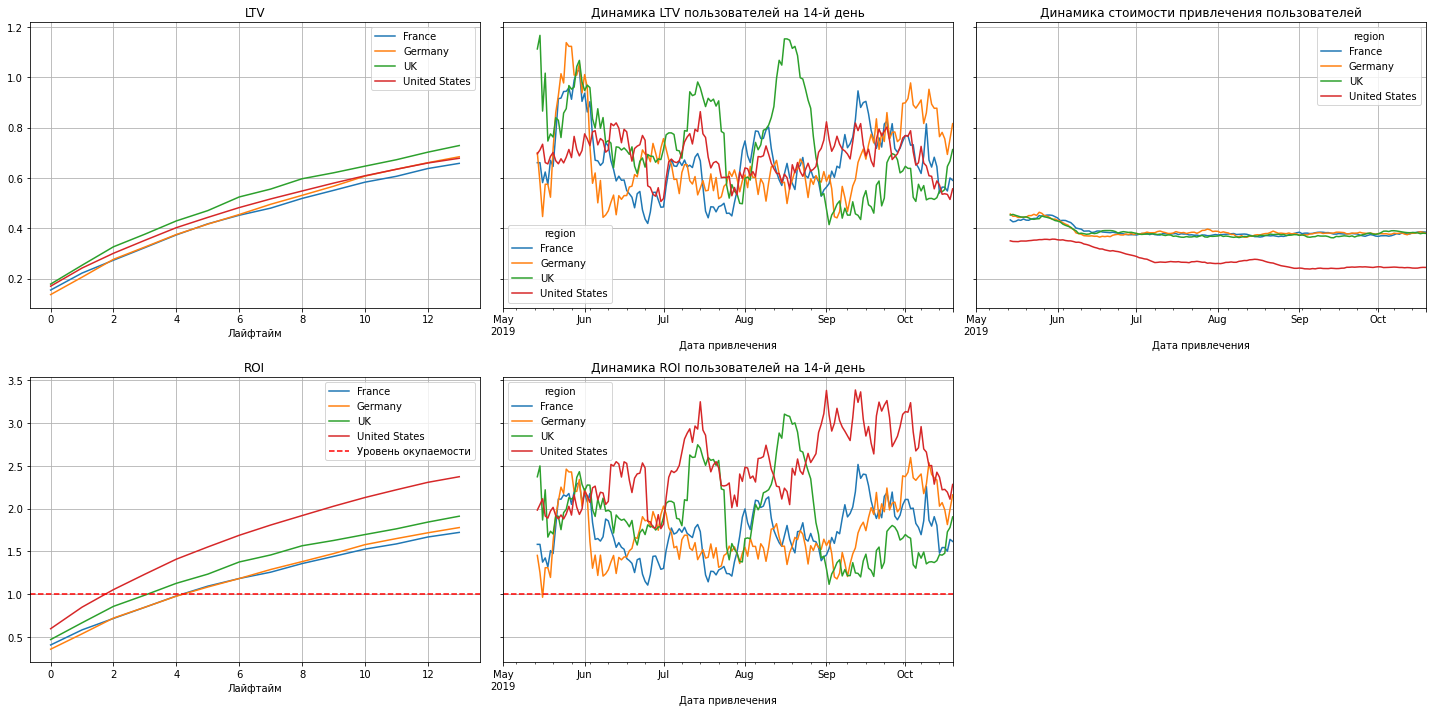

In [79]:
#строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

 - LTV растёт у всех 4-х стран
 - Динамика стоимости привлечения пользователей практически стабильна для трех стран(Германия, Франция и Англия). А у США показатели стоимости даже на порядок ниже
 - Все страны показывают хорошую окупаемость уже на 3-й месяц
 
Посмотрим на конверсию и удержание

In [80]:
#смотрим конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

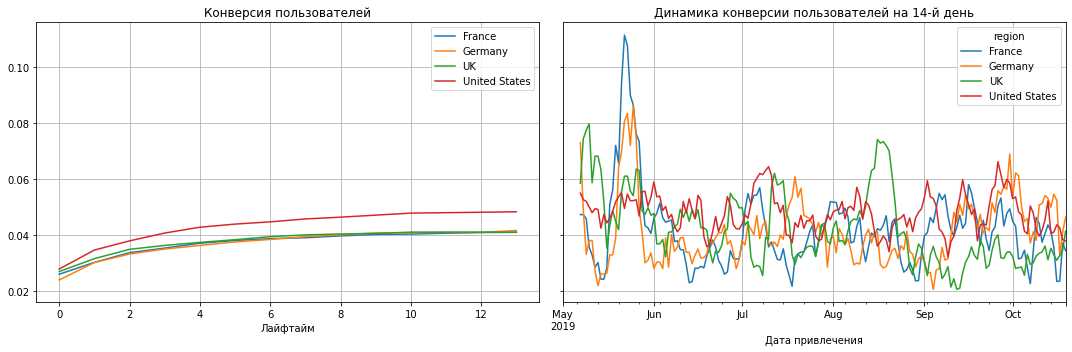

In [81]:
#строим графики
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

 - Лидер конверсии - США. У остальных трех стран относительно одинаковые положительные показатели

In [82]:
#смотрим удержание с разбивкой по каналам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

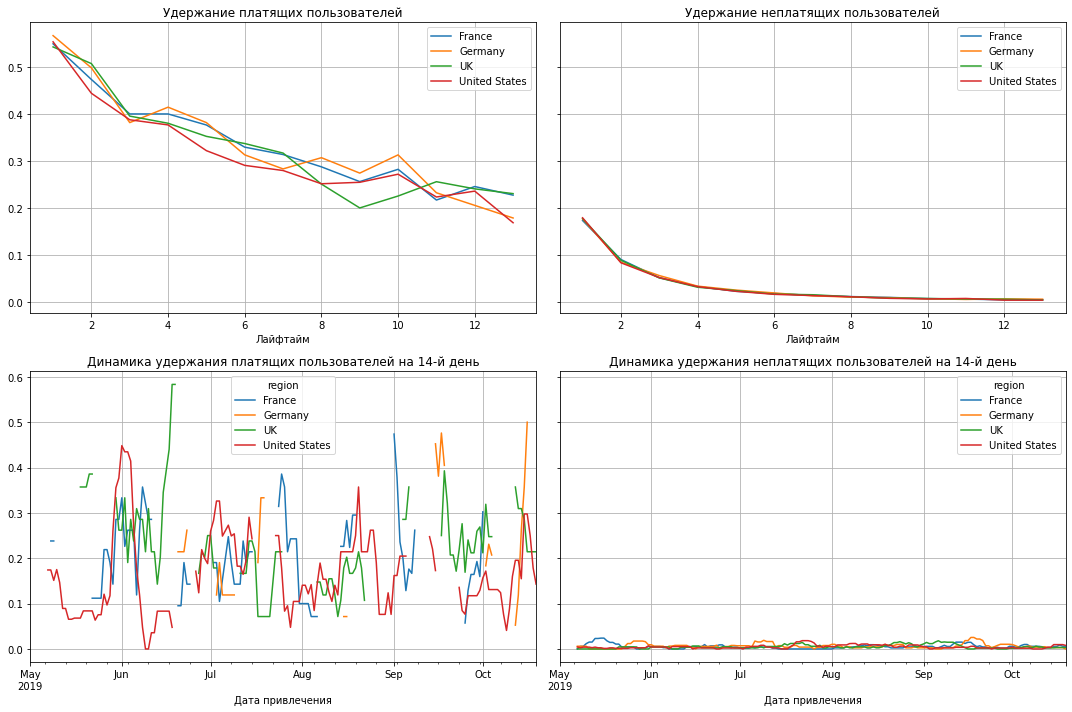

In [83]:
#строим графики
plot_retention(retention_grouped, retention_history, horizon_days) 

 - Удержание платящих пользователей снижается, как и удержание неплатящих юзеров

## Вывод

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

В результате исследования были изучены данные о пользователях и затратах на рекламу приложения Procrastinate Pro+ из 4 стран: Франция, Германия, Англия и США. так же был проведен анализ 10 рекламных каналов для привлечения пользователей и анализ устройств, которыми пользуются юзеры.

Основные причины неэффективности привлечения пользователей следующие:
 - чрезмерные расходы на рекламу для привлечения пользователей из США
 - чрезмерные расходы на рекламу для привлечения пользователей с помощью канала TipTop

Рекомендации для отдела маркетинга:
 - проанализировать и сократить количество расходов на рекламу для пользователей из США по отношению к каналу TipTop
 - снизить количество расходов на рекламу на неокупаемые каналы: FaceBoom и  TipTop в США, так как исключив эти каналы  - в разделе 5.6 можно видеть, как окупаемость США является лидирующей. И эти каналы используются только в США
 - снизить количество расходов на рекламу на неокупаемый канал AdNonSense в Италии, Германии и Англии -выполнив эти действия окупаемость этих трех стран так же возрастет
 - увеличить финансирование окупившихся каналов, в часности - lambdaMediaAds, RocketSuperAds и WahooNetBanner. Эти каналы показывают себя как наиболее успешные и перспективные и к тому же, они представлены в 3-х странах
 - для улучшения удержания пользователей рекомендуется изучить более подробно техническую часть приложения - снижение удержания вполне может возникнуть из-за технических неполадок. Так же, можно разработать и предоставить для пользователей форму, в которой они могут указать сложности, с которыми они столкнулись при использовании приложения (неудобные страницы приложения, контент, не вызывающий интереса и прочее)
 - для улучшения конверсии рекомендуется так же создать форму обратной связи, в которой юзеры смогут ответить - какие сложности возникают у них при использовании приложения(отсутсвие рассылок, напоминаний о покупках в корзине, необходимость постоянно заполнять свои данные при каждом заказе и прочее)